In [1]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from math import e,pi 
from scipy import interpolate
import statistics 
from scipy import signal
from scipy.stats import linregress
import scipy.fftpack
import matplotlib.pyplot as plt
tt=[]
yy=[]
rr=[]
q=500
N=300
uu=[]
lum1=[]
lum3=[]
z=np.random.uniform(-1, 1,N)
y1=np.zeros(N) 
output1=np.zeros((q,N),dtype=np.float)
output3=np.zeros((q,N),dtype=np.float)
tm=np.zeros((q,N),dtype=np.int)
rin=np.zeros(q+1)
rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r ]+1
    a=1
    t=1 
    for x1 in np.arange (0,N):
           if(t<N):
            y1[0]=4
            y1[t] = 1+( 0.7*y1[t-1]+1*(3.5*(1/rin[r]) **0.5)* z[t])
            u1=(y1[t])**0.25
            uu.append(u1)
            L1= lambda xa1:  (10**10) *(1*pi*xa1/(-1+ e**(((xa1)**0.75)*69/(u1*470) ))) * (94)**-5 #10**8 at below eddington 
            L3= lambda xa3: (10**10)*(1*pi*xa3/(-1+ e**(((xa3)**0.75)*69/( u1*620) ))) * (124)**-5 # 10**9 
            flux1,err1 = integrate.quad(L1,rin [r ], rin[r+1])
            flux3,err3= integrate.quad(L3,rin [r ]  ,rin[r+1])
            lum1.append(flux1)
            lum3.append(flux3)
            tm[r,x1]=t        
            output1[r,x1]= flux1
            output3[r,x1]= flux3
            yy.append(u1)
            rr.append(rin[r])
            t=t+a;
final1=sum(output1)
final3=sum(output3)
final1 =(np.trim_zeros(final1)) 
t1=(np.trim_zeros(tm[0,:]))
final3 =(np.trim_zeros(final3)) 
light1= 100*(np.std(final1))/np.mean(final1) 
light2= 100*(np.std(final3))/np.mean(final3) 
print('amp in g band ', light1,':amp in r band' ,light2,':ratio -g/r' ,light1/light2 )
plt.plot(rr,lum1/np.mean(lum1)  ,'g',label='T*=20 ')
plt.plot(rr ,lum3/np.mean(lum3)  ,'r',label='T*=50  ' )
plt.xlabel('radius in units of Schwars. radius (unitless)')
plt.ylabel('flux normalized with mean (unitless) ')
plt.title('flux vs radius at 600 nm for T*=20 AND T*=50 ')
plt.legend()
plt.show()

plt.plot(t1,final1/np.mean(final1),'g')
plt.xlabel('time (arbitrary unit)')
plt.ylabel('flux normalized with mean (unitless) ')
plt.title('light curve for ∅ = 0.7 ')
#plt.plot(t1,final3/np.mean(final3),'r')
plt.show()
freqs1, psd = signal.welch(final1/np.mean(final1) )
plt.plot(freqs1,psd,label=' ∅ = 0.7')
plt.xlabel('frequency (Hz)')
plt.ylabel('psd ((Amplitude ^2)/Hz)')
plt.title('PSD :power spectral density for ∅ = 0.7  ')
plt.show()
freqs=np.log(freqs1[ 10:])
psds=np.log(psd[10: ])
plt.figure(figsize=(5, 4))
plt.plot(freqs , psds,label='slope = -1.6' )
plt.title('PSD: power spectral density log-log plot for ∅ = 0.7  ')
plt.xlabel('log(frequency(Hz)/1Hz)')
plt.ylabel('log(psd (Amplitude ^2)/Hz)/1Amplitude ^2/1Hz')
slope,intercept=np.polyfit(freqs,psds,1)
print(slope,intercept)
plt.plot(freqs, slope*freqs+intercept,'r' )
plt.legend()
plt.show()


amp in g band  8.009401423124803 :amp in r band 6.663576918564558 :ratio -g/r 1.2019672798869947


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

-1.5940413401630027 -8.090156025779438


<Figure size 500x400 with 1 Axes>

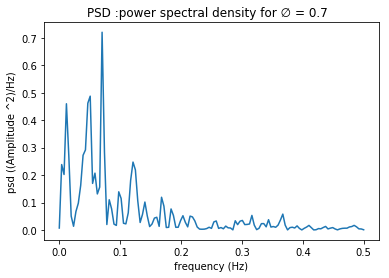

-1.1870370424480476 -5.888047496952911


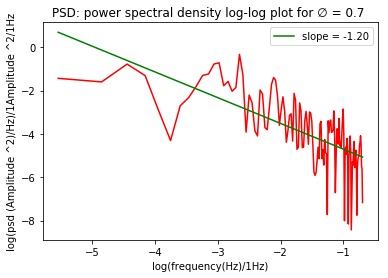

In [75]:
freqs1, psd = signal.welch(final1/np.mean(final1) )
plt.plot(freqs1,psd,label=' ∅ = 0.7')
plt.xlabel('frequency (Hz)')
plt.ylabel('psd ((Amplitude ^2)/Hz)')
plt.title('PSD :power spectral density for ∅ = 0.7  ')
plt.show()
freqs=np.log(freqs1[ 1:])
psds=np.log(psd[1: ])
plt.plot(freqs , psds,'r' )
plt.title('PSD: power spectral density log-log plot for ∅ = 0.7 ')
plt.xlabel('log(frequency(Hz)/1Hz)')
plt.ylabel('log(psd (Amplitude ^2)/Hz)/1Amplitude ^2/1Hz')
slope,intercept=np.polyfit(freqs,psds,1)
print(slope,intercept)
plt.plot(freqs, slope*freqs+intercept,'g',label='slope = -1.20' )
plt.legend()
